In [90]:
import matplotlib.pyplot as plt
import data_utils
import numpy as np

In [2]:
# add argument to load a specific capture
data, keys = data_utils.load_capture_data("2021-04-09-014947")

In [3]:
# provide no arguments to load the latest folder
data, keys = data_utils.load_capture_data()

In [70]:
# convert the most recent capture to JSON
data_utils.convert_capture_json()

wrote json to d:\AiDrummer\CapturedMotion\2021-04-09-052358\capture_2021-04-09-052358.json


In [71]:
data = data_utils.load_json("../CapturedMotion/2021-04-09-052358/capture_2021-04-09-052358.json")

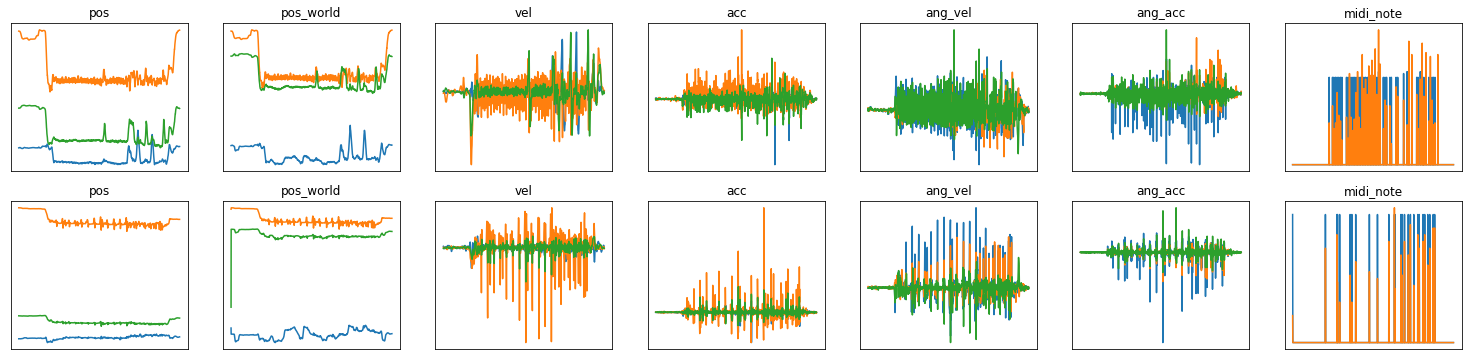

In [72]:

fig = plt.gcf()
fig.set_size_inches(26, 6)
index = 1
for i, a in enumerate(data.keys()):
    controllers = len(data.keys())
    subplots = len(data[a].keys())
    for j, b in enumerate(data[a].keys()):
        plt.subplot(controllers, subplots, index)
        plt.title(b)
        plt.xticks([])
        plt.yticks([])
        plt.plot(data[a][b])
        index += 1
plt.show()

(1472,)


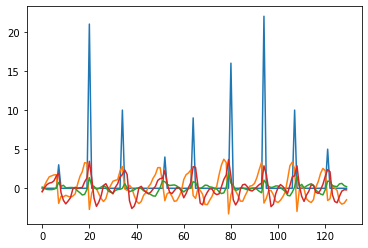

In [137]:

rng = [500, 630]
controller = "c1"
midi_notes = np.asarray(data[controller]["midi_note"])
midi_notes = midi_notes[:, 1]
print(midi_notes.shape)
unique = np.unique(midi_notes)
midi_simple = []
for m in midi_notes:
    midi_simple.append(np.where(unique == m)[0])
midi_simple = np.asarray(midi_simple)

plt.plot(midi_simple[rng[0]:rng[1]])
plt.plot(data[controller]["ang_vel"][rng[0]:rng[1]])
plt.show()

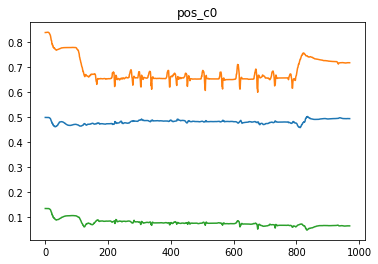

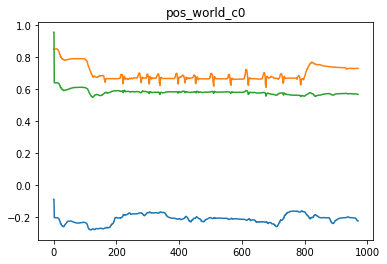

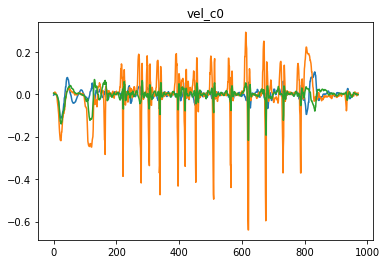

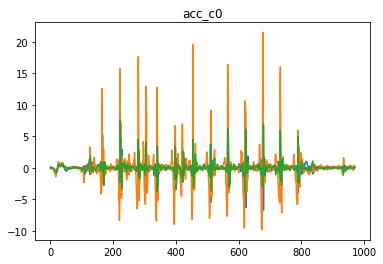

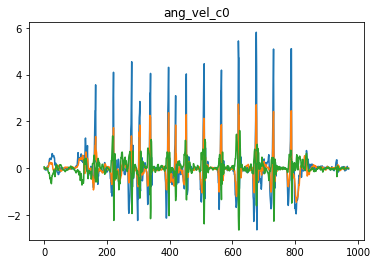

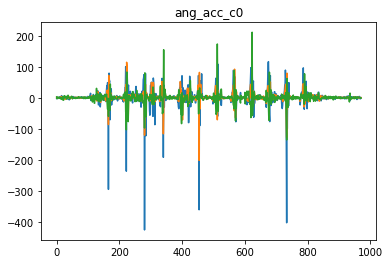

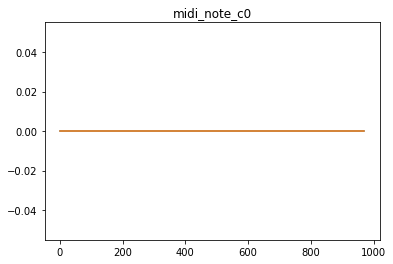

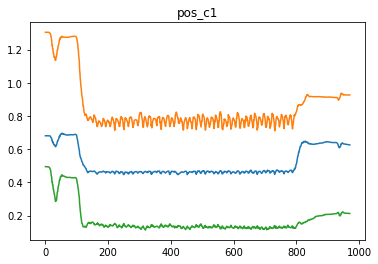

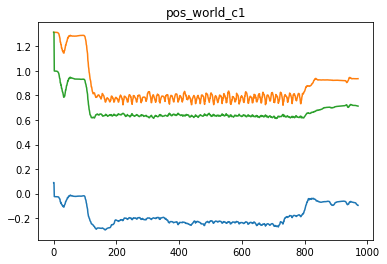

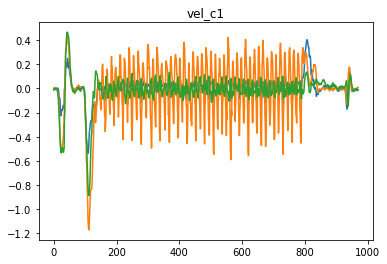

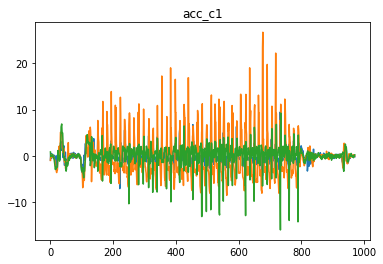

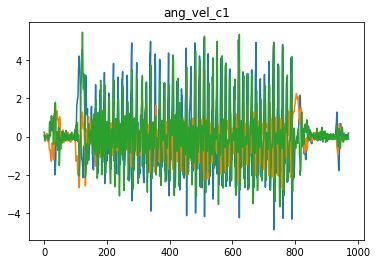

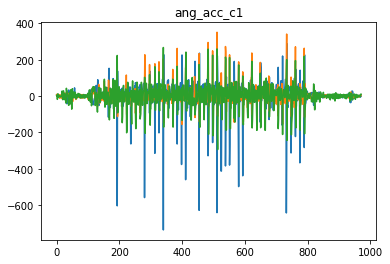

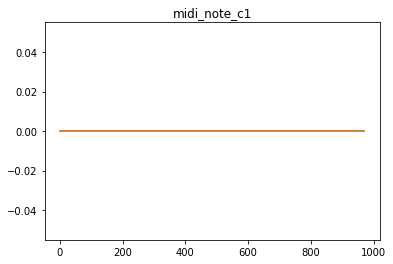

In [4]:
for d, k in zip(data, keys):
    plt.title(k)
    plt.plot(d[:])
    plt.show()